In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/loan_data_set (1).csv')

In [ ]:
df


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df1=df.dropna()
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df1.shape

(480, 13)

In [ ]:
x=df1.iloc[:,1:11]
x
y=df1.iloc[:,-1]
y

1      N
2      Y
3      Y
4      Y
5      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 480, dtype: object

In [ ]:
X=pd.get_dummies(x)

In [ ]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
XX=std.fit_transform(X)

In [ ]:
var=p.explained_variance_ratio_
var

array([1.93172265e-01, 1.33837960e-01, 1.19405727e-01, 9.22820918e-02,
       8.02900435e-02, 6.92592464e-02, 6.20022347e-02, 6.14524577e-02,
       5.82848133e-02, 5.31770315e-02, 5.27119764e-02, 2.41241529e-02,
       2.64173471e-32, 8.17069251e-33, 2.57920983e-33, 2.14301387e-33,
       1.60621407e-33])

In [ ]:
var1=np.cumsum(var)*100
var

array([1.93172265e-01, 1.33837960e-01, 1.19405727e-01, 9.22820918e-02,
       8.02900435e-02, 6.92592464e-02, 6.20022347e-02, 6.14524577e-02,
       5.82848133e-02, 5.31770315e-02, 5.27119764e-02, 2.41241529e-02,
       2.64173471e-32, 8.17069251e-33, 2.57920983e-33, 2.14301387e-33,
       1.60621407e-33])

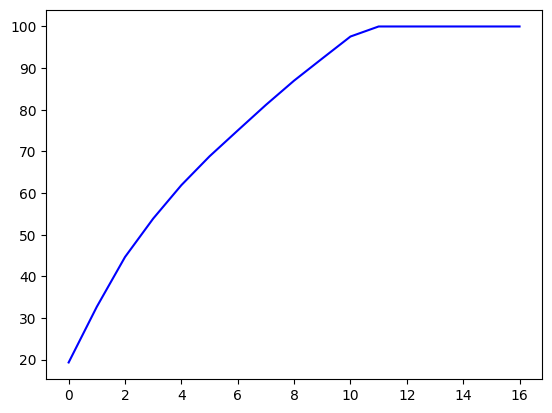

In [ ]:
plt.plot(var1,color='blue')

In [ ]:
imp
pca = PCA(n_components = 8)
pca_values = pca.fit_transform(XX)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(XX,y,test_size=0.3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier().fit(xtrain,ytrain)

In [ ]:
pred=DT.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
report=classification_report(pred,ytest)
print(report)

              precision    recall  f1-score   support

           N       0.57      0.66      0.61        44
           Y       0.84      0.78      0.81       100

    accuracy                           0.74       144
   macro avg       0.70      0.72      0.71       144
weighted avg       0.76      0.74      0.75       144



In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(pca_values,y,test_size=0.3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier().fit(xtrain,ytrain)

In [ ]:
pred=DT.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
report=classification_report(pred,ytest)
print(report)

              precision    recall  f1-score   support

           N       0.47      0.43      0.45        49
           Y       0.72      0.75      0.73        95

    accuracy                           0.64       144
   macro avg       0.59      0.59      0.59       144
weighted avg       0.63      0.64      0.63       144

